# Poisson Statistics of Radioactive Decay
To demonstrate that radioactive decay obey Poisson statistics, by specifically using Sr-90 samples and a high voltage of 950 V.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from scipy import optimize
from scipy.special import factorial

In [2]:
# import data as a table

data_10 = pd.read_csv('exp1_10s-1.tsv', sep='\t', header = 9) # reads the table of raw data for the counts at a rate of 10 s^-1
data_10.columns = ['High Voltage', 'Counts', 'Elapsed Time', 'Date/Time', 'NaN'] #column headings
#there was an extra empty column due to the separator chosen
counts_10 = data_10.Counts

data_100 = pd.read_csv('exp1_100s-1.tsv', sep='\t', header = 9) # reads the table
data_100.columns = ['High Voltage', 'Counts', 'Elapsed Time', 'Date/Time', 'NaN'] #column headings
counts_100 = data_100.Counts

In [3]:
# calculate average (A), standrard deviation (s), s/A and s/sqrt(A)

A_10 = counts_10.mean() # calculate the sample mean
s_10 = counts_10.std() # calculate the sample standard deviation
print('For the count rate of 10 counts per second:')
print('A = ' + str(A_10) + ' s = ' + str(s_10) + ' s/A = '\
      + str(s_10/A_10) + ' s/sqrt(A)= ' + str(s_10/(A_10**0.5)))

A_100 = counts_100.mean()
s_100 = counts_100.std()
print('For the count rate of 100 counts per second:')
print('A = ' + str(A_100) + ' s = ' + str(s_100) + ' s/A = '\
      + str(s_100/A_100) + ' s/sqrt(A)= ' + str(s_100/(A_100**0.5)))

For the count rate of 10 counts per second:
A = 61.98 s = 7.962898662047686 s/A = 0.12847529303077906 s/sqrt(A)= 1.0114522919945237
For the count rate of 100 counts per second:
A = 1076.48 s = 32.39755596728032 s/A = 0.030095827109914087 s/sqrt(A)= 0.9874367033764919


In [4]:
# import frequency table

table_10 = pd.read_csv('exp_1_10s-1.txt', sep='\t', header = 1) # reads the frquency table
table_10.columns = ['Counts', 'Frequency'] #column headings
x_10 = table_10.Counts # Counts
y_10 = table_10.Frequency #Frequency

table_100 = pd.read_csv('exp_1_100s-1.txt', sep='\t', header = 1) # reads the frquency table
table_100.columns = ['Counts', 'Frequency'] #column headings
x_100 = table_100.Counts # Counts
y_100 = table_100.Frequency #Frequency

In [5]:
def poisson(x, l):
    return np.exp(-l)*np.power(l, x)/factorial(x)

<Figure size 432x288 with 0 Axes>

<Figure size 504x432 with 0 Axes>

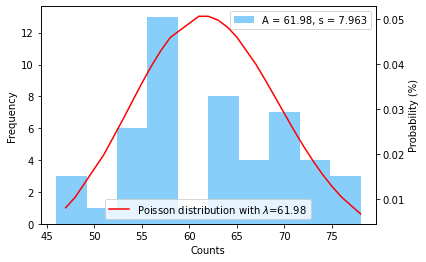

<Figure size 432x288 with 0 Axes>

<Figure size 504x432 with 0 Axes>

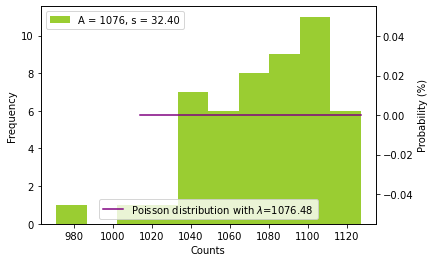

In [6]:
# plot the data

f1 = plt.figure()
plt.figure(figsize=(7, 6))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist(counts_10, label = 'A = 61.98, s = 7.963', color='lightskyblue')
ax2.plot(x_10, poisson(x_10, 61.98), label='Poisson distribution with $\lambda$=61.98', color='r')

ax1.set_xlabel("Counts")
ax1.set_ylabel("Frequency")
ax2.set_ylabel("Probability (%)")
ax1.legend(loc='best')
ax2.legend(loc='best')

f2 = plt.figure()
plt.figure(figsize=(7, 6))
fig, ax3 = plt.subplots()
ax4 = ax3.twinx()
ax3.hist(counts_100, label = 'A = 1076, s = 32.40', color='yellowgreen')
ax4.plot(x_100, poisson(x_100, 1076), label='Poisson distribution with $\lambda$=1076', color='purple')
ax3.set_xlabel("Counts")
ax3.set_ylabel("Frequency")
ax4.set_ylabel("Probability (%)")
ax3.legend(loc='best')
ax4.legend(loc='lower center')
plt.show()